# Generalizability of MCS case - Evaluation of Water Year 2020 

In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import pandas as pd 
from pathlib import Path
import seaborn as sns 
from matplotlib.dates import DateFormatter

### Hovmoller diagrams of relative vorticity and precip

In [2]:
### get RELATIVE VORTICITY for specific month ### 
mon = 7

### ERA5 vorticity ### 
era5= xr.open_mfdataset('/glade/u/home/kukulies/ERA5/ERA5_vorticity_2020' +str(mon)+ '.nc')
# downsample from hourly to 3 hourly 
era5 = era5.resample(time = '3H').mean()
era5_rv_filt = era5.relative_vorticity
minlat = 30
maxlat = 36
dlat = 0.25 
# select latitude band 
latband_filt = era5_rv_filt.sel(latitude = np.arange(minlat,maxlat, dlat)) 
# mean over latitude 
mean_era= latband_filt.mean('latitude') 
time_era = mean_era.time.values 

In [3]:
### get ERA5 IVT or northward water vapor flux  JJA### 
minlon = 100
maxlon = 108
dlat = 0.25 
minlat, maxlat = 25,40

mon = 7
era5_ds= xr.open_dataset('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.vinteg/2020'+ str(mon).zfill(2)+'/e5.oper.an.vinteg.162_072_viwvn.ll025sc.2020'+str(mon).zfill(2)+'0100_2020'+str(mon).zfill(2)+'3123.nc')
# subset region 
era5_qv = era5_ds.VIWVN.where( (era5_ds.latitude >= minlat )   & (era5_ds.latitude <= maxlat ), drop = True ) 
#era5_qv = era5_qv.resample(time = '3H').mean()

# select latitude band 
latband_filt = era5_qv.sel(longitude = np.arange(minlon,maxlon, dlat)) 
# mean over latitude 
mean_era_qv_jul= latband_filt.mean('longitude') 

mon = 8
era5_ds= xr.open_dataset('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.vinteg/2020'+ str(mon).zfill(2)+'/e5.oper.an.vinteg.162_072_viwvn.ll025sc.2020'+str(mon).zfill(2)+'0100_2020'+str(mon).zfill(2)+'3123.nc')
era5_qv = era5_ds.VIWVN.where( (era5_ds.latitude >= minlat )   & (era5_ds.latitude <= maxlat ), drop = True ) 
latband_filt = era5_qv.sel(longitude = np.arange(minlon,maxlon, dlat))  
mean_era_qv_aug= latband_filt.mean('longitude') 

mon = 6
era5_ds= xr.open_dataset('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.vinteg/2020'+ str(mon).zfill(2)+'/e5.oper.an.vinteg.162_072_viwvn.ll025sc.2020'+str(mon).zfill(2)+'0100_2020'+str(mon).zfill(2)+'3023.nc')
era5_qv = era5_ds.VIWVN.where( (era5_ds.latitude >= minlat )   & (era5_ds.latitude <= maxlat ), drop = True ) 
latband_filt = era5_qv.sel(longitude = np.arange(minlon,maxlon, dlat))  
mean_era_qv_jun= latband_filt.mean('longitude') 

### Example month with hourly data of precip and vorticity 

In [ ]:
### GPM ### 
gpm= xr.open_mfdataset('/glade/work/kukulies/obs/gpm/2019-2020/20200'+ str(mon) + '/gpm_20200'+ str(mon)+'_cat.nc')
# downsample from hourly to 3 hourly 
gpm = gpm.resample(time = '3H').mean()
precip = gpm.precipitationCal
minlat = 28.05
maxlat = 34.05
dlat = 0.1
# select latitude band 
latband_filt = precip.sel(lat = np.arange(minlat,maxlat, dlat)) 
# mean over latitude 
mean_gpm = latband_filt.mean('lat') 
time_gpm= mean_gpm.time.values

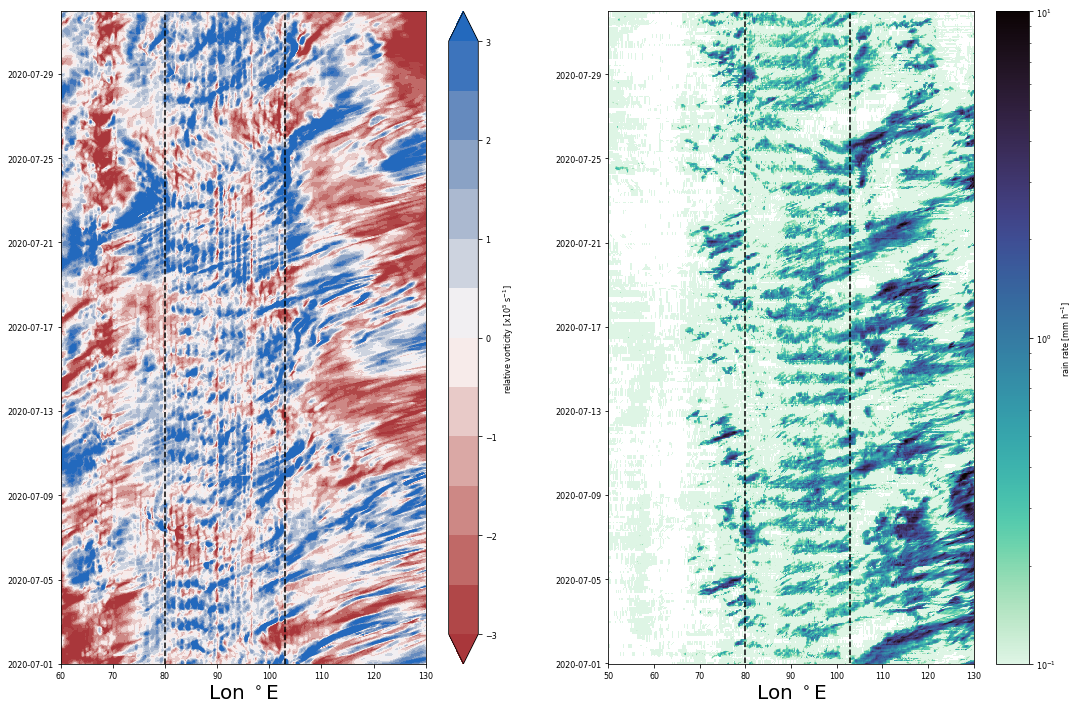

In [23]:
fs = 8
plt.figure(figsize=(18,12))

### plot vorticity ### 
ax = plt.subplot(1,2,1)
cmap1= sns.color_palette("vlag_r", as_cmap=True)
r1 = np.arange(-3, 3.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_era.longitude.values, mean_era.time.values, mean_era.values/1e-5 , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(mean_era.longitude.values[::40])
ax.set_xlabel('Lon $^\circ$E', fontsize = 20)
ax.vlines(80,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
ax.vlines(103,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]') 

### plot precip ###
ax = plt.subplot(1,2,2)
r2 = np.arange(0.5,3.5,0.5)
norm = colors.BoundaryNorm(boundaries= r2,  ncolors= 256)
cmap2 =  sns.color_palette("mako_r", as_cmap=True)
norm = colors.LogNorm(vmin=10**(-1), vmax=10**1 ) 
m = ax.pcolormesh(mean_gpm.lon.values, mean_gpm.time.values, mean_gpm.values , cmap=cmap2, norm = norm, shading = 'auto')
#m = ax.contourf(mean_gpm.lon.values, mean_gpm.time.values, mean_gpm.values , cmap=cmap2,levels = r2, extend ='both')
ax.set_xticks(np.arange(50,140,10))
ax.set_xlabel('Lon $^\circ$E', fontsize = 20 )
ax.vlines(80,mean_gpm.time.values[0], mean_gpm.time.values[-1], 'k', '--')
ax.vlines(103,mean_gpm.time.values[0], mean_gpm.time.values[-1], 'k', '--')
plt.colorbar(m, label = 'rain rate [mm h$^{-1}$]')
plt.rcParams.update({'font.size': fs})

plt.show()

## Vorticity - water transport interaction 

### June 

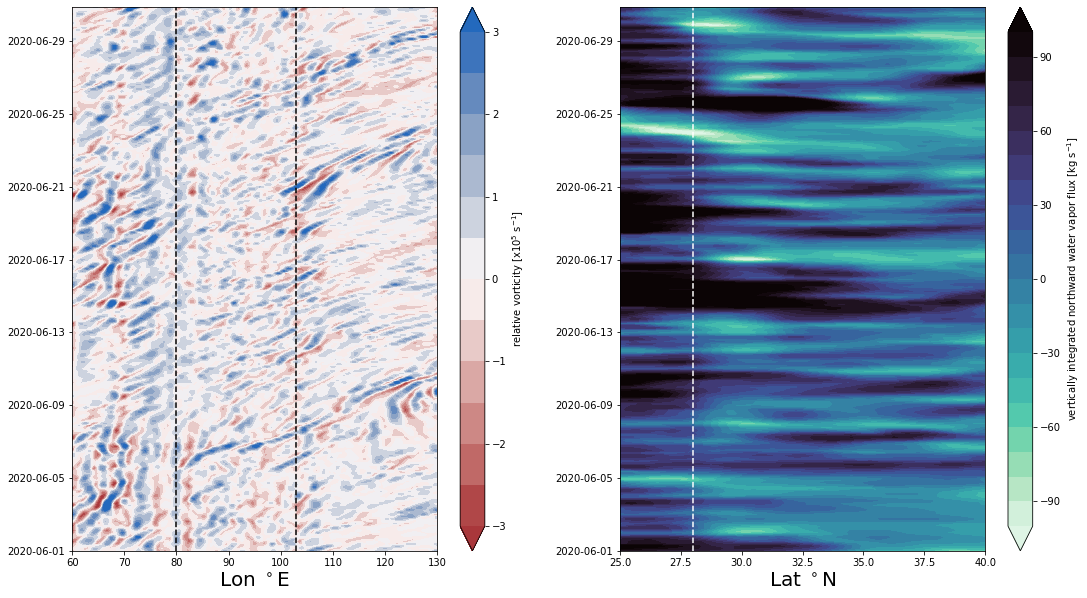

In [66]:
fs = 8
plt.figure(figsize=(18,10))

### plot vorticity ### 
ax = plt.subplot(1,2,1)
cmap1= sns.color_palette("vlag_r", as_cmap=True)
r1 = np.arange(-3, 3.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_era.longitude.values, mean_era.time.values, mean_era.values , cmap=cmap1,levels = r1, extend= 'both') # /1e-5
ax.set_xticks(mean_era.longitude.values[::40])
ax.set_xlabel('Lon $^\circ$E', fontsize = 20)
ax.vlines(80,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
ax.vlines(103,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]') 


### qv ###
ax = plt.subplot(1,2,2)
cmap1= sns.color_palette("mako_r", as_cmap=True)
r1 = np.arange(-100, 110, 10)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_era_qv.latitude.values, mean_era_qv.time.values, mean_era_qv.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(mean_era_qv.latitude.values[::10])
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.vlines(28,mean_era.time.values[0], mean_era.time.values[-1], 'white', '--')
plt.colorbar(m, label = 'vertically integrated northward water vapor flux [kg s$^{-1}$]') 

plt.show()

## Get MCS init locations (latitude) at given time points


First time point when MCS is detected within Sichuan basin area 

In [6]:
import pickle 
filename  = '/glade/work/kukulies/tracks/Cloud_tracking_water-year202006_CPC_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    tracks_jun = pickle.load(f) 
    
filename  = '/glade/work/kukulies/tracks/Cloud_tracking_water-year202007_CPC_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    tracks_jul = pickle.load(f)
    
filename  = '/glade/work/kukulies/tracks/Cloud_tracking_water-year202008_CPC_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    tracks_aug = pickle.load(f)
    
filename  = '/glade/work/kukulies/tracks/Cloud_tracking_water-year202006_WRF_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    wrftracks_jun = pickle.load(f) 
    
filename  = '/glade/work/kukulies/tracks/Cloud_tracking_water-year202007_WRF_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    wrftracks_jul = pickle.load(f)
    
filename  = '/glade/work/kukulies/tracks/Cloud_tracking_water-year202008_WRF_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    wrftracks_aug = pickle.load(f)

### Same for WRF-nudging 2020

In [7]:
import pickle 
filename  = '/glade/scratch/kukulies/tracks/water-year/tbb/Cloud_tracking_water-year202006_spectral-nudging_WRF_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    wrftracks_jun_n = pickle.load(f) 
    
filename  = '/glade/scratch/kukulies/tracks/water-year/tbb/Cloud_tracking_water-year202007_spectral-nudging_WRF_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    wrftracks_jul_n = pickle.load(f)
    
filename  = '/glade/scratch/kukulies/tracks/water-year/tbb/Cloud_tracking_water-year202008_spectral-nudging_WRF_precip-colocs_sichuan.pickle'
with open(filename, 'rb') as f:
    wrftracks_aug_n = pickle.load(f)

In [8]:
def get_init_locs(tracks):
    mcs_lats = []
    mcs_times = []
    mcs_size = []
    for track in tracks.keys():
        mcs = tracks[track]
        lons = mcs['rgrMassCentLatLon'][:,0]
        lats = mcs['rgrMassCentLatLon'][:, 1]
        times = mcs['TimeAct']
        lat = lats[0]
        time= times[0]
        mcs_lats.append(lat)
        mcs_times.append(time)
        mcs_size.append(mcs['rgrSize'][0])
                
    return mcs_lats, mcs_times, mcs_size 

In [9]:
def get_tracks(tracks):
    mcs_lats = []
    mcs_times = []
    mcs_size = []
    for track in tracks.keys():
        mcs = tracks[track]
        lons = mcs['rgrMassCentLatLon'][:,0]
        lats = mcs['rgrMassCentLatLon'][:, 1]
        times = mcs['TimeAct']
        for idx,lon in enumerate(lons): 
            # only show if MCS is in longitude range (and not still over the TP)-> 102 
            if lon >= 100 and lon<=110:
                #if lats[idx] >=28 and lats[idx] <=34:
                lat = lats[idx]
                time= times[idx]
                mcs_lats.append(lat)
                mcs_times.append(time)
                mcs_size.append(mcs['major_axis_length'][idx])   
    return mcs_lats, mcs_times, np.array(mcs_size )/4

In [10]:
### ERA5 ### 
mcs_lats_jun, mcs_times_jun, mcs_size_jun = get_tracks(tracks_jun)
mcs_lats_jul, mcs_times_jul, mcs_size_jul = get_tracks(tracks_jul)
mcs_lats_aug, mcs_times_aug, mcs_size_aug = get_tracks(tracks_aug)


### WRF ### 
wrf_lats_jun, wrf_times_jun, wrf_size_jun = get_tracks(wrftracks_jun)
wrf_lats_jul, wrf_times_jul, wrf_size_jul = get_tracks(wrftracks_jul)
wrf_lats_aug, wrf_times_aug, wrf_size_aug = get_tracks(wrftracks_aug)



### WRF nudging### 
wrf_lats_jun_n, wrf_times_jun_n, wrf_size_jun_n = get_tracks(wrftracks_jun_n)
wrf_lats_jul_n, wrf_times_jul_n, wrf_size_jul_n = get_tracks(wrftracks_jul_n)
wrf_lats_aug_n, wrf_times_aug_n, wrf_size_aug_n = get_tracks(wrftracks_aug_n)


#### convert WRF lats to indices in south_north dimension ####


def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]


wrf4kmd02_lats= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_VORT.nc').XLAT.values[:,0]

wrf_lats_jun_sn = np.array(())
wrf_lats_jul_sn = np.array(())
wrf_lats_aug_sn = np.array(())

for tick in wrf_lats_jun: 
    wrf_lats_jun_sn= np.append(wrf_lats_jun_sn , find_nearest_idx(wrf4kmd02_lats, tick)[0]) 
for tick in wrf_lats_jul: 
    wrf_lats_jul_sn= np.append(wrf_lats_jul_sn , find_nearest_idx(wrf4kmd02_lats, tick)[0]) 
for tick in wrf_lats_aug: 
    wrf_lats_aug_sn= np.append(wrf_lats_aug_sn , find_nearest_idx(wrf4kmd02_lats, tick)[0]) 
    
    
wrf_lats_jun_sn_n = np.array(())
wrf_lats_jul_sn_n = np.array(())
wrf_lats_aug_sn_n = np.array(())

for tick in wrf_lats_jun_n: 
    wrf_lats_jun_sn_n = np.append(wrf_lats_jun_sn_n , find_nearest_idx(wrf4kmd02_lats, tick)[0]) 
for tick in wrf_lats_jul_n: 
    wrf_lats_jul_sn_n = np.append(wrf_lats_jul_sn_n , find_nearest_idx(wrf4kmd02_lats, tick)[0]) 
for tick in wrf_lats_aug_n: 
    wrf_lats_aug_sn_n = np.append(wrf_lats_aug_sn_n , find_nearest_idx(wrf4kmd02_lats, tick)[0]) 
    

### July 

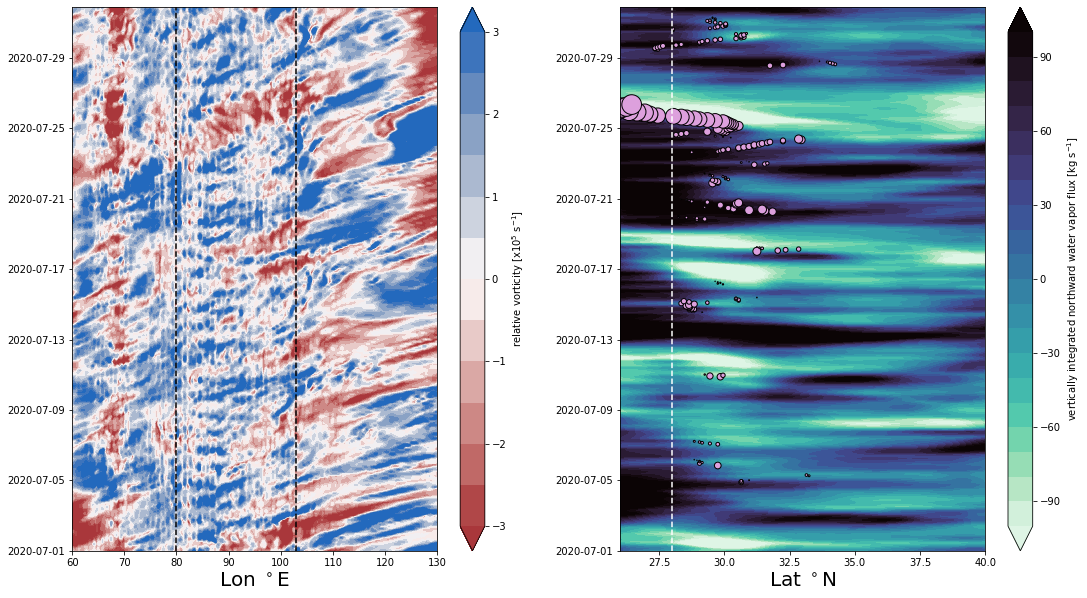

In [97]:
fs = 8
plt.figure(figsize=(18,10))


plt.title('July')
### plot vorticity ### 
ax = plt.subplot(1,2,1)
cmap1= sns.color_palette("vlag_r", as_cmap=True)
r1 = np.arange(-3, 3.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_era.longitude.values, mean_era.time.values, mean_era.values/1e-5 , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(mean_era.longitude.values[::40])
ax.set_xlabel('Lon $^\circ$E', fontsize = 20)
ax.vlines(80,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
ax.vlines(103,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]') 

### qv ###
ax = plt.subplot(1,2,2)
cmap1= sns.color_palette("mako_r", as_cmap=True)
r1 = np.arange(-100, 110, 10)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_era_qv.latitude.values, mean_era_qv.time.values, mean_era_qv.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(mean_era_qv.latitude.values[::10])
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)


### Add MCS Locations ### 
ax.scatter(mcs_lats_jul, mcs_times_jul, s= np.array(mcs_size_jul)/10000 *2, marker = 'o', color = 'plum', edgecolor='black')


ax.set_xlim(26,40)
ax.vlines(28,mean_era.time.values[0], mean_era.time.values[-1], 'white', '--')
plt.colorbar(m, label = 'vertically integrated northward water vapor flux [kg s$^{-1}$]') 


plt.show()

## Water vapor transport for entire  summer season

In [11]:
### WRF water vapor transport  JJA ### 

minlon = 100
maxlon = 108

mon=6
wrf_ds= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WY2020-'+str(mon).zfill(2)+'_ivt.nc')
# subset region 
wrf_qv = wrf_ds.qu
# select latitude band 
latband_filt = wrf_qv.where( (wrf_ds.XLONG >= minlon)   & (wrf_ds.XLONG <= maxlon ), drop = True ) 
# mean over latitude 
mean_wrf_qv_jun= latband_filt.mean('west_east') 

mon=7
wrf_ds= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WY2020-'+str(mon).zfill(2)+'_ivt.nc')
wrf_qv = wrf_ds.qu
latband_filt = wrf_qv.where( (wrf_ds.XLONG >= minlon)   & (wrf_ds.XLONG <= maxlon ), drop = True ) 
mean_wrf_qv_jul= latband_filt.mean('west_east') 


mon=8
wrf_ds= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WY2020-'+str(mon).zfill(2)+'_ivt.nc')
wrf_qv = wrf_ds.qu
latband_filt = wrf_qv.where( (wrf_ds.XLONG >= minlon)   & (wrf_ds.XLONG <= maxlon ), drop = True ) 
mean_wrf_qv_aug= latband_filt.mean('west_east') 

## Same for WRF nudging 

In [12]:
### WRF water vapor transport  JJA ### 


mon=6
wrf_ds= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WY2020_'+str(mon).zfill(2)+'_IVT_spectral-nudging.nc')
# subset region 
wrf_qv = wrf_ds.qu
# select latitude band 
latband_filt = wrf_qv.where( (wrf_ds.XLONG >= minlon)   & (wrf_ds.XLONG <= maxlon ), drop = True ) 
# mean over latitude 
mean_wrf_qv_jun_n= latband_filt.mean('west_east') 

mon=7
wrf_ds= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WY2020_'+str(mon).zfill(2)+'_IVT_spectral-nudging.nc')
wrf_qv = wrf_ds.qu
latband_filt = wrf_qv.where( (wrf_ds.XLONG >= minlon)   & (wrf_ds.XLONG <= maxlon ), drop = True ) 
mean_wrf_qv_jul_n= latband_filt.mean('west_east') 


mon=8
wrf_ds= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WY2020_'+str(mon).zfill(2)+'_IVT_spectral-nudging.nc')
wrf_qv = wrf_ds.qu
latband_filt = wrf_qv.where( (wrf_ds.XLONG >= minlon)   & (wrf_ds.XLONG <= maxlon ), drop = True ) 
mean_wrf_qv_aug_n= latband_filt.mean('west_east') 


In [13]:

# get right lats and lons 

#### get WRF lons 

wrf4kmd02_lats= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_VORT.nc').XLAT.values[:,0]
wrf4kmd02_lons= xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_VORT.nc').XLONG.values[0,:]

### get right WRF ticks
# get right xticks to compare WRF lons to ERA5 
latticks = np.arange(26,42,2)
wrf4kmd02_latticks = np.array(())

for tick in latticks: 
    wrf4kmd02_latticks= np.append(wrf4kmd02_latticks , find_nearest_idx(wrf4kmd02_lats, tick)[0]) 
    
    
lonticks = np.arange(70,120,10)
wrf4kmd02_lonticks = np.array(())

for tick in lonticks: 
    wrf4kmd02_lonticks= np.append(wrf4kmd02_lonticks , find_nearest_idx(wrf4kmd02_lons, tick)[0]) 

wrf_time= wrf_ds.time.values

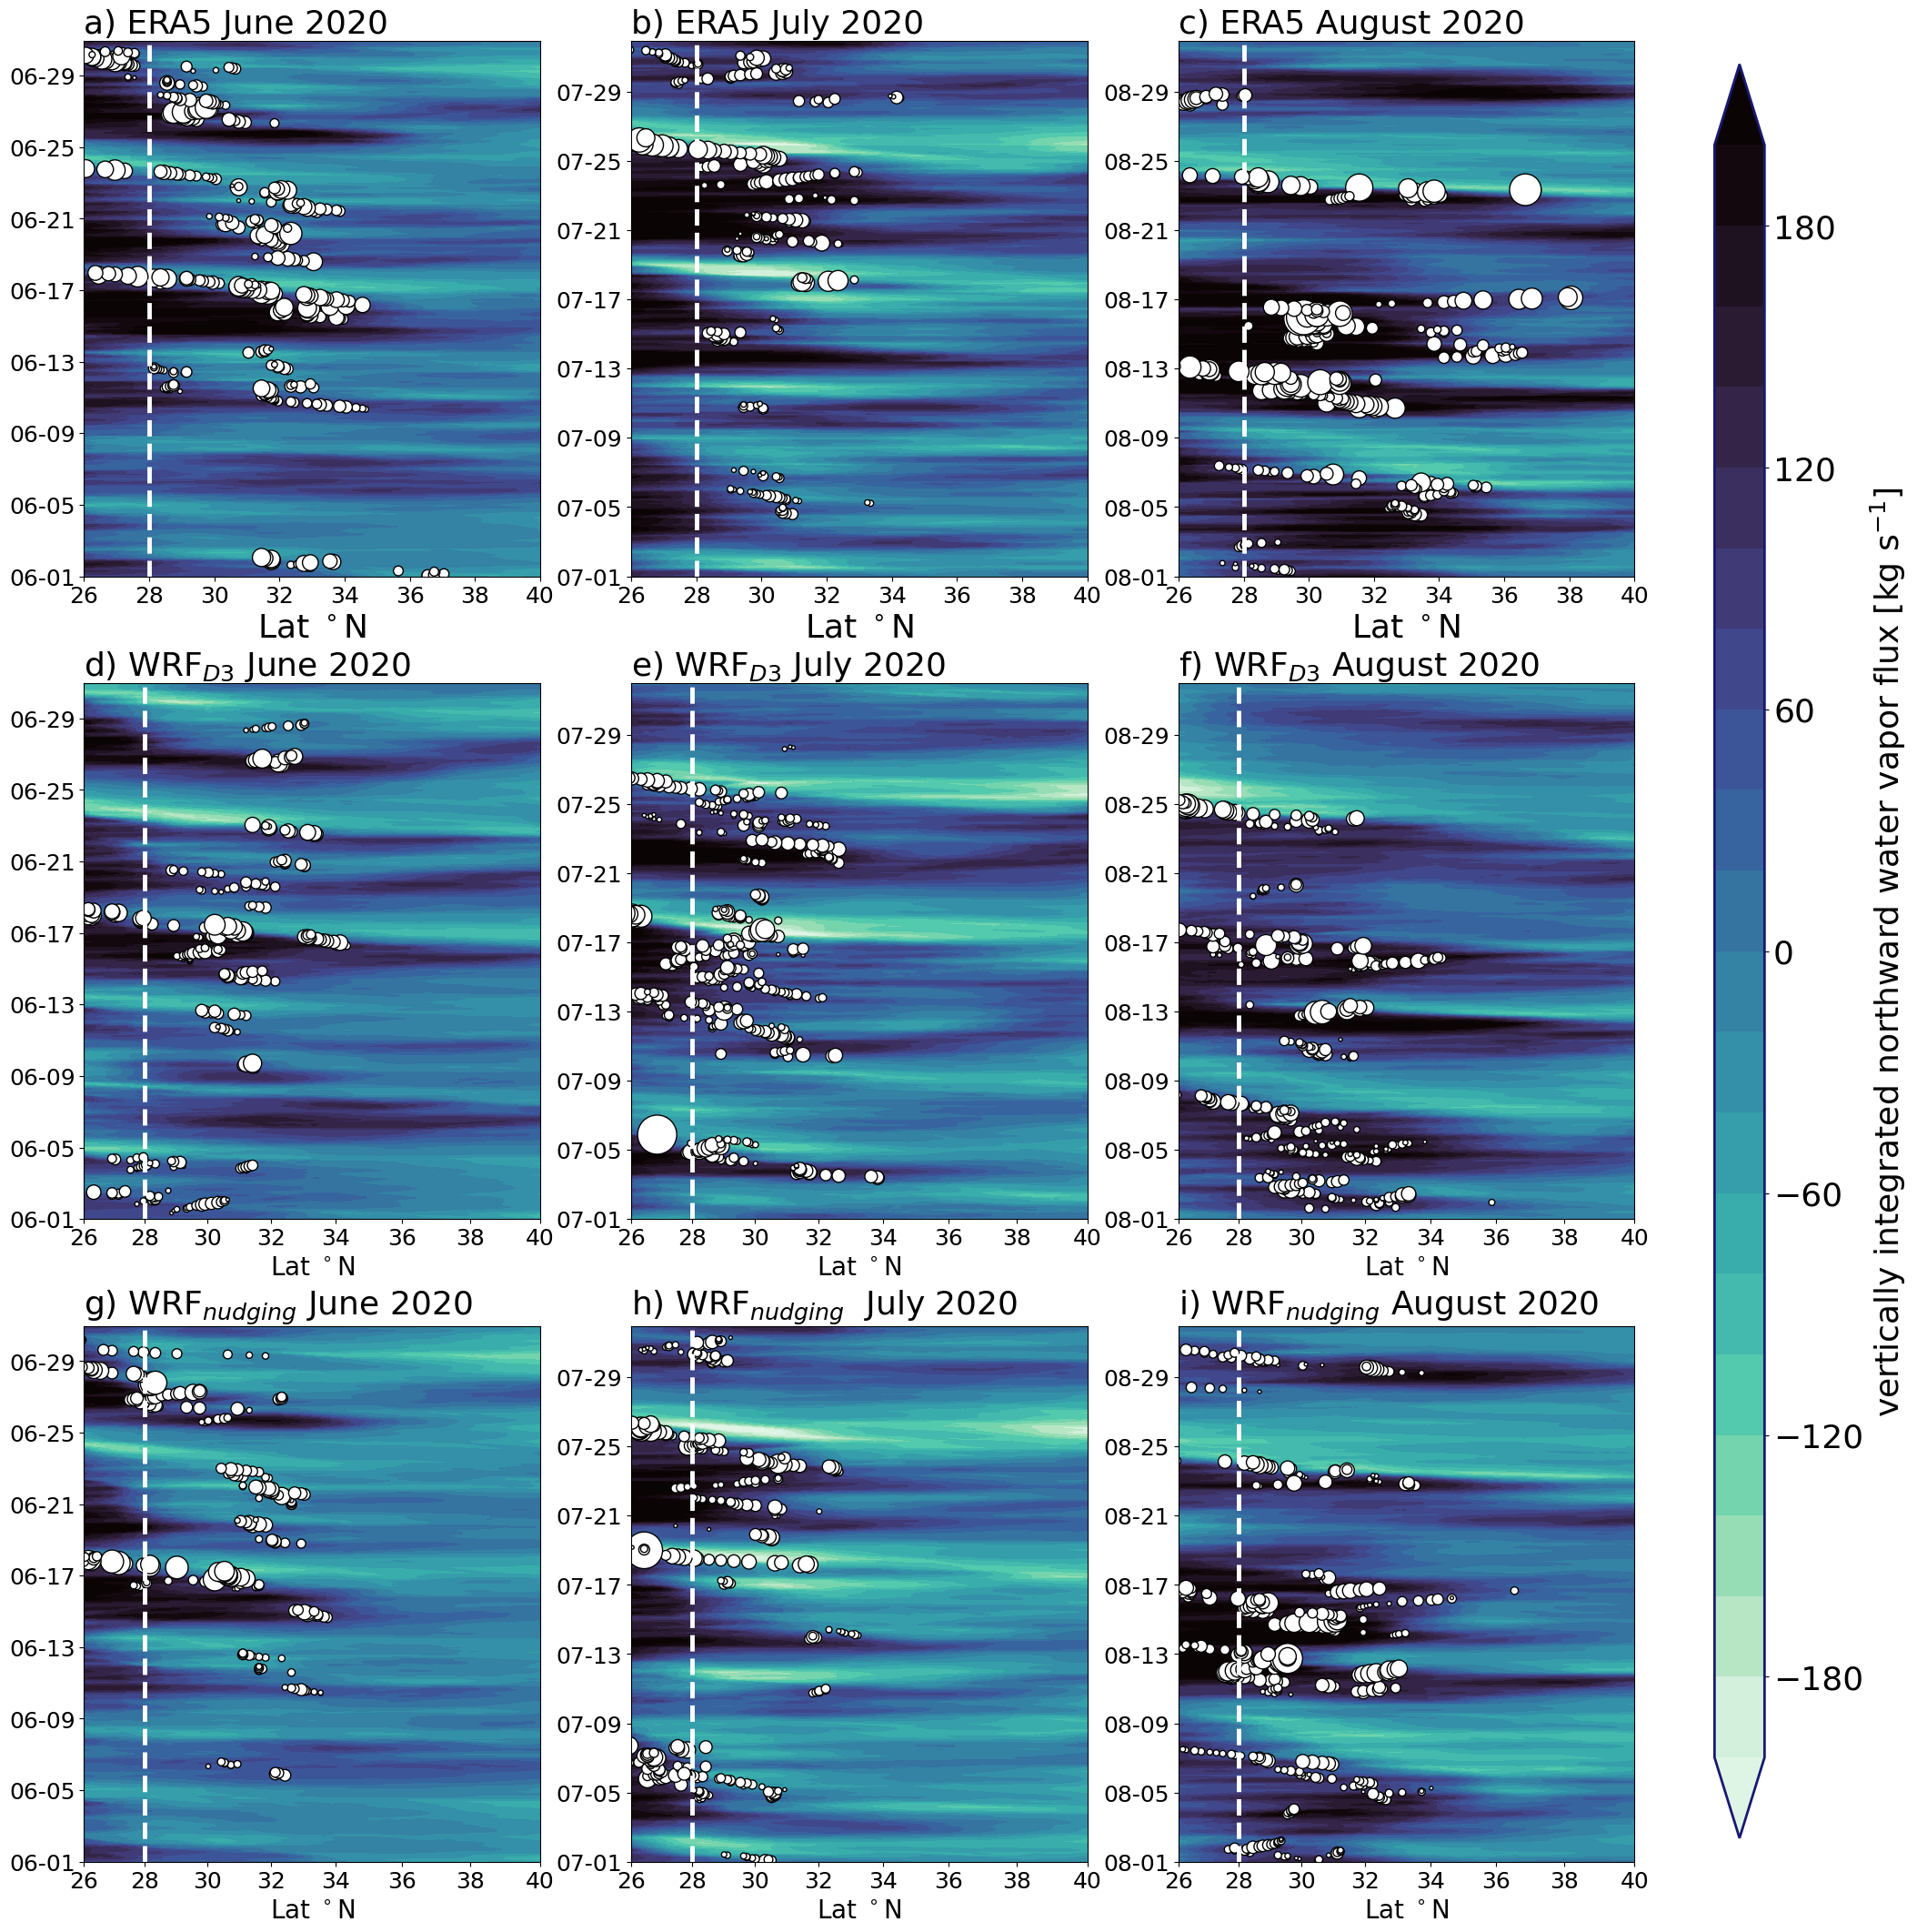

In [16]:
fig=plt.figure(figsize=(22,26))

### general fig setting ### 
fs =26
lw=3.5
cmap1= sns.color_palette("mako_r", as_cmap=True)
r1 = np.arange(-200, 220, 20)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)

ROWS = 3 
COLS = 3 

### ERA5 ### 
ax = plt.subplot(ROWS, COLS,1)
m=ax.contourf(mean_era_qv_jun.latitude.values, mean_era_qv_jun.time.values, mean_era_qv_jun.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(latticks)
ax.set_title('a) ERA5 June 2020', fontsize = fs, loc= 'left')
ax.set_xlabel('Lat $^\circ$N', fontsize = fs)
ax.set_xlim(26,40)
ax.vlines(28,mean_era_qv_jun.time.values[0], mean_era_qv_jun.time.values[-1], 'white', '--', lw=lw)
### Add MCS Locations ### 
ax.scatter(mcs_lats_jun, mcs_times_jun, s= np.array(mcs_size_jun), marker = 'o', color = 'white', edgecolor='black')
date_form = DateFormatter("%m-%d")
ax.yaxis.set_major_formatter(date_form)


ax = plt.subplot(ROWS, COLS,2)
m=ax.contourf(mean_era_qv_jul.latitude.values, mean_era_qv_jul.time.values, mean_era_qv_jul.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(latticks)
ax.set_title('b) ERA5 July 2020', fontsize = fs, loc= 'left')
ax.set_xlabel('Lat $^\circ$N', fontsize = fs)
ax.set_xlim(26,40)
ax.vlines(28,mean_era_qv_jul.time.values[0], mean_era_qv_jul.time.values[-1], 'white', '--', lw=lw)
### Add MCS Locations ### 
ax.scatter(mcs_lats_jul, mcs_times_jul, s= np.array(mcs_size_jul), marker = 'o', color = 'white', edgecolor='black')
ax.yaxis.set_major_formatter(date_form)

ax = plt.subplot(ROWS, COLS,3)
m=ax.contourf(mean_era_qv_aug.latitude.values, mean_era_qv_aug.time.values, mean_era_qv_aug.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(latticks)
ax.set_title('c) ERA5 August 2020', fontsize = fs, loc= 'left')
ax.set_xlabel('Lat $^\circ$N', fontsize = fs)
ax.set_xlim(26,40)
ax.vlines(28,mean_era_qv_aug.time.values[0], mean_era_qv_aug.time.values[-1], 'white', '--', lw=lw)
ax.yaxis.set_major_formatter(date_form)

### Add MCS Locations ### 
ax.scatter(mcs_lats_aug, mcs_times_aug, s= np.array(mcs_size_aug), marker = 'o', color = 'white', edgecolor='black')

### WRF ### 
ax = plt.subplot(ROWS, COLS,4)
m=ax.contourf(mean_wrf_qv_jun.south_north.values, mean_era_qv_jun.time.values, mean_wrf_qv_jun.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 
idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)
ax.yaxis.set_major_formatter(date_form)

ax.set_title(r'd) WRF$_{D3}$ June 2020', fontsize = fs, loc= 'left')
### Add MCS Locations ### 
ax.scatter(wrf_lats_jun_sn, wrf_times_jun, s= np.array(wrf_size_jun), marker = 'o', color = 'white', edgecolor='black')



ax = plt.subplot(ROWS, COLS,5)
m=ax.contourf(mean_wrf_qv_jul.south_north.values,  mean_era_qv_jul.time.values, mean_wrf_qv_jul.values, cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 
idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)
ax.yaxis.set_major_formatter(date_form)

ax.set_title(r'e) WRF$_{D3}$ July 2020', fontsize = fs, loc= 'left')
### Add MCS Locations ### 
ax.scatter(wrf_lats_jul_sn, wrf_times_jul, s= np.array(wrf_size_jul), marker = 'o', color = 'white', edgecolor='black')

                 
ax = plt.subplot(ROWS, COLS,6 )
m=ax.contourf(mean_wrf_qv_aug.south_north.values, mean_era_qv_aug.time.values, mean_wrf_qv_aug.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 
idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)
ax.yaxis.set_major_formatter(date_form)

ax.set_title(r'f) WRF$_{D3}$ August 2020', fontsize = fs, loc= 'left')
### Add MCS Locations ### 
ax.scatter(wrf_lats_aug_sn, wrf_times_aug, s= np.array(wrf_size_aug), marker = 'o', color = 'white', edgecolor='black')
           
    
    
### same for WRF nudging ####   
    
ax = plt.subplot(ROWS, COLS,7 )
m=ax.contourf(mean_wrf_qv_jun.south_north.values, mean_era_qv_jun.time.values, mean_wrf_qv_jun_n.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 
idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)
ax.yaxis.set_major_formatter(date_form)

ax.set_title(r'g) WRF$_{nudging}$ June 2020', fontsize = fs, loc= 'left')
### Add MCS Locations ### 
ax.scatter(wrf_lats_jun_sn_n, wrf_times_jun_n, s= np.array(wrf_size_jun_n), marker = 'o', color = 'white', edgecolor='black')



ax = plt.subplot(ROWS, COLS,8)
m=ax.contourf(mean_wrf_qv_jul.south_north.values,  mean_era_qv_jul.time.values, mean_wrf_qv_jul_n.values, cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 
idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)
ax.yaxis.set_major_formatter(date_form)

ax.set_title(r'h) WRF$_{nudging}$  July 2020', fontsize = fs, loc= 'left')
### Add MCS Locations ### 
ax.scatter(wrf_lats_jul_sn_n, wrf_times_jul_n, s= np.array(wrf_size_jul_n), marker = 'o', color = 'white', edgecolor='black')

                 
ax = plt.subplot(ROWS, COLS, 9 )
m=ax.contourf(mean_wrf_qv_aug.south_north.values, mean_era_qv_aug.time.values, mean_wrf_qv_aug_n.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 
idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)
ax.yaxis.set_major_formatter(date_form)

ax.set_title(r'i) WRF$_{nudging}$ August 2020', fontsize = fs, loc= 'left')
### Add MCS Locations ### 
ax.scatter(wrf_lats_aug_sn_n, wrf_times_aug_n, s= np.array(wrf_size_aug_n), marker = 'o', color = 'white', edgecolor='black')
           
    
# colorbar
cb_ax2 = fig.add_axes([0.94, 0.12,0.025, 0.75])
cbar = fig.colorbar(m, cax=cb_ax2, extend = 'both', drawedges = False)
cbar.outline.set_edgecolor('midnightblue')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'vertically integrated northward water vapor flux [kg s$^{-1}$]', size = 26)

plt.rcParams.update({'font.size': 18})
plt.savefig('plots/WY2020_simulated_water_vapor_transport_nudging.png', bbox_inches = 'tight', facecolor='white')
plt.show()

## Same for WRF

In [11]:
### get data for specific month ### 
mon = 8

### WRF vorticity ### 
wrf= xr.open_mfdataset('/glade/scratch/kukulies/wrf_processed/WRF_WY2020-'+str(mon).zfill(2)+'_VORT.nc')
# downsample from hourly to 3 hourly 
#wrf = wrf.resample(time = '3H').mean()
wrf_rv_filt = wrf.relative_vorticity_filtered
minlat = 30
maxlat = 36
dlat = 0.25 
# select latitude band 
latband_filt = wrf_rv_filt.where( (wrf.XLAT >= minlat )   & (wrf.XLAT <= maxlat ), drop = True ) 
# mean over latitude 
mean_wrf= latband_filt.mean('south_north') 
time_wrf = mean_wrf.time.values


/glade/u/home/kukulies/.local/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


## July 

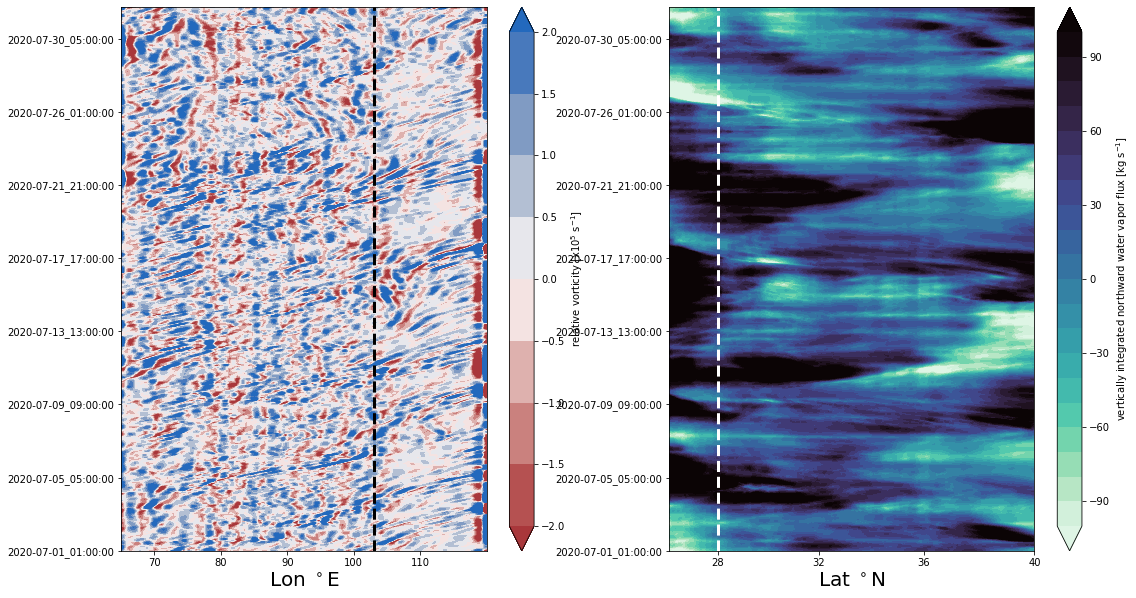

In [41]:
fs = 10
plt.figure(figsize=(18,10))

plt.title('August')
### plot vorticity ### 
ax = plt.subplot(1,2,1)
cmap1= sns.color_palette("vlag_r", as_cmap=True)
r1 = np.arange(-2, 2.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_wrf.west_east.values, wrf_time, mean_wrf.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lon $^\circ$E', fontsize = 20)
ax.set_xticks(wrf4kmd02_lonticks)
ax.set_xticklabels(lonticks)
ax.set_yticks(wrf_time[::100])
lw=3.0
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lons,103) 
ax.axvline(wrf4km_idx,color='black', linestyle= '--', lw = lw) 

plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]') 


### qv ###
ax = plt.subplot(1,2,2)
cmap1= sns.color_palette("mako_r", as_cmap=True)
r1 = np.arange(-100, 110, 10)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_wrf_qv.south_north.values, wrf_time, mean_wrf_qv.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)

wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 

idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)

ax.set_yticks(wrf_time[::100])
plt.colorbar(m, label = 'vertically integrated northward water vapor flux [kg s$^{-1}$]') 
plt.show()

## August

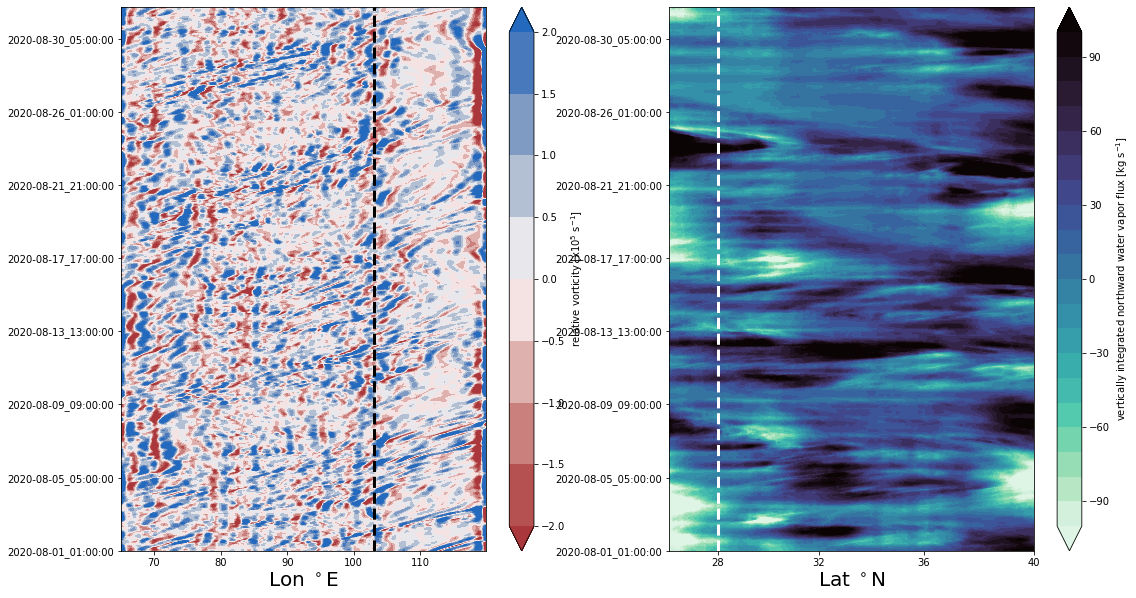

In [49]:
fs = 10
plt.figure(figsize=(18,10))

plt.title('August')
### plot vorticity ### 
ax = plt.subplot(1,2,1)
cmap1= sns.color_palette("vlag_r", as_cmap=True)
r1 = np.arange(-2, 2.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_wrf.west_east.values, wrf_time, mean_wrf.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lon $^\circ$E', fontsize = 20)
ax.set_xticks(wrf4kmd02_lonticks)
ax.set_xticklabels(lonticks)
ax.set_yticks(wrf_time[::100])
lw=3.0
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lons,103) 
ax.axvline(wrf4km_idx,color='black', linestyle= '--', lw = lw) 

plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]') 


### qv ###
ax = plt.subplot(1,2,2)
cmap1= sns.color_palette("mako_r", as_cmap=True)
r1 = np.arange(-100, 110, 10)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_wrf_qv.south_north.values, wrf_time, mean_wrf_qv.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)

wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 

idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)

ax.set_yticks(wrf_time[::100])
plt.colorbar(m, label = 'vertically integrated northward water vapor flux [kg s$^{-1}$]') 
plt.show()

## June

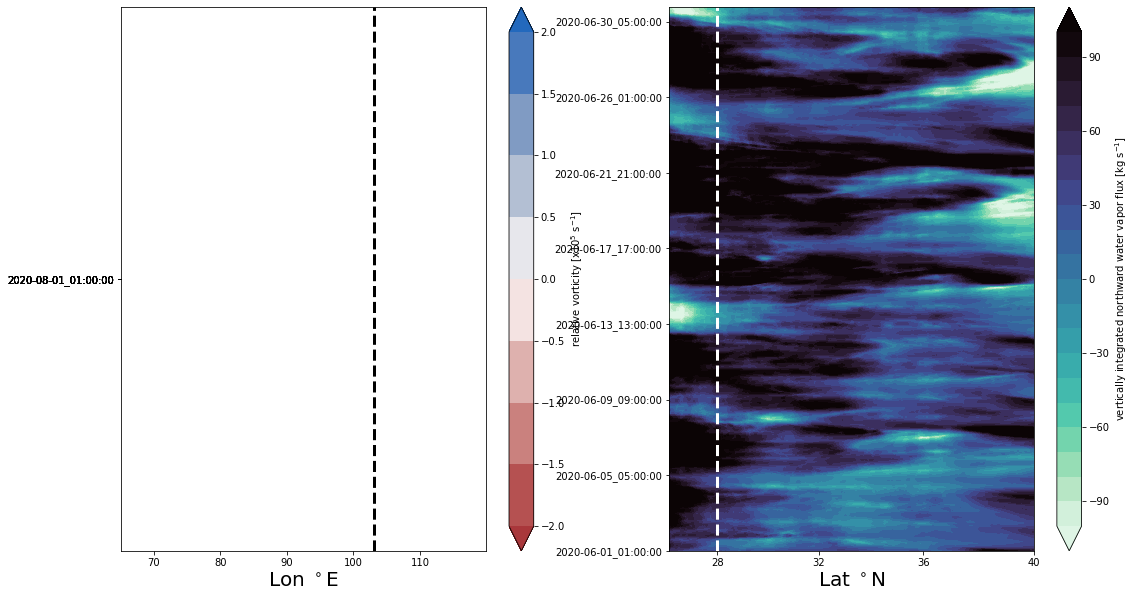

In [62]:
fs = 10
plt.figure(figsize=(18,10))

plt.title('August')
### plot vorticity ### 
ax = plt.subplot(1,2,1)
cmap1= sns.color_palette("vlag_r", as_cmap=True)
r1 = np.arange(-2, 2.5, 0.5)
wrf_time = mean_wrf.time.values
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_wrf.west_east.values, wrf_time, mean_wrf.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lon $^\circ$E', fontsize = 20)
ax.set_xticks(wrf4kmd02_lonticks)
ax.set_xticklabels(lonticks)
ax.set_yticks(wrf_time[::100])
lw=3.0
wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lons,103) 
ax.axvline(wrf4km_idx,color='black', linestyle= '--', lw = lw) 

plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]') 


### qv ###
wrf_time = mean_wrf_qv.time.values
ax = plt.subplot(1,2,2)
cmap1= sns.color_palette("mako_r", as_cmap=True)
r1 = np.arange(-100, 110, 10)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_wrf_qv.south_north.values, wrf_time, mean_wrf_qv.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xlabel('Lat $^\circ$N', fontsize = 20)
ax.set_xticks(wrf4kmd02_latticks)
ax.set_xticklabels(latticks)

wrf4km_idx , la = find_nearest_idx(wrf4kmd02_lats,28) 
ax.axvline(wrf4km_idx,color='white', linestyle= '--', lw = lw) 

idx1 , la = find_nearest_idx(wrf4kmd02_lats,26) 
idx2 , la = find_nearest_idx(wrf4kmd02_lats,40) 
ax.set_xlim(idx1,idx2)

ax.set_yticks(wrf_time[::100])
plt.colorbar(m, label = 'vertically integrated northward water vapor flux [kg s$^{-1}$]') 
plt.show()

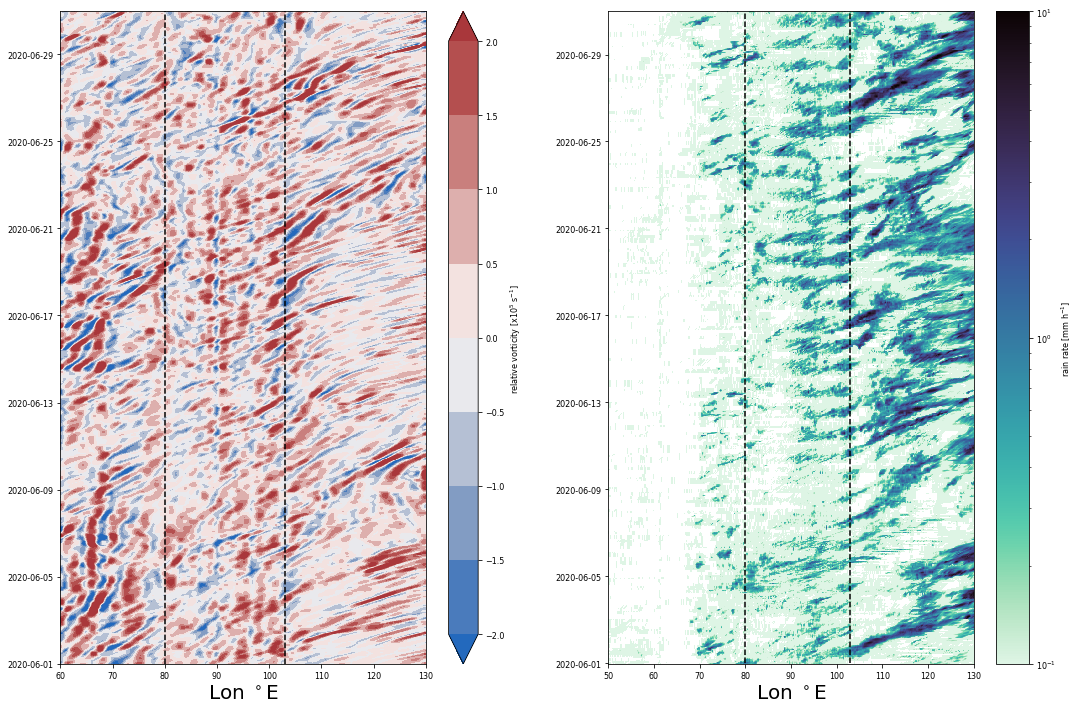

In [13]:
fs = 8
plt.figure(figsize=(18,12))

### plot vorticity ### 
ax = plt.subplot(1,2,1)
cmap1= sns.color_palette("vlag", as_cmap=True)
r1 = np.arange(-2, 2.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_era.longitude.values, mean_era.time.values, mean_era.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(mean_era.longitude.values[::40])
ax.set_xlabel('Lon $^\circ$E', fontsize = 20)
ax.vlines(80,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
ax.vlines(103,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]') 

### plot precip ###
ax = plt.subplot(1,2,2)
r2 = np.arange(0.5,3.5,0.5)
norm = colors.BoundaryNorm(boundaries= r2,  ncolors= 256)
cmap2 =  sns.color_palette("mako_r", as_cmap=True)
norm = colors.LogNorm(vmin=10**(-1), vmax=10**1 ) 
m = ax.pcolormesh(mean_gpm.lon.values, mean_gpm.time.values, mean_gpm.values , cmap=cmap2, norm = norm, shading = 'auto')
#m = ax.contourf(mean_gpm.lon.values, mean_gpm.time.values, mean_gpm.values , cmap=cmap2,levels = r2, extend ='both')
ax.set_xticks(np.arange(50,140,10))
ax.set_xlabel('Lon $^\circ$E', fontsize = 20 )
ax.vlines(80,mean_gpm.time.values[0], mean_gpm.time.values[-1], 'k', '--')
ax.vlines(103,mean_gpm.time.values[0], mean_gpm.time.values[-1], 'k', '--')
plt.colorbar(m, label = 'rain rate [mm h$^{-1}$]')
plt.rcParams.update({'font.size': fs})

plt.show()

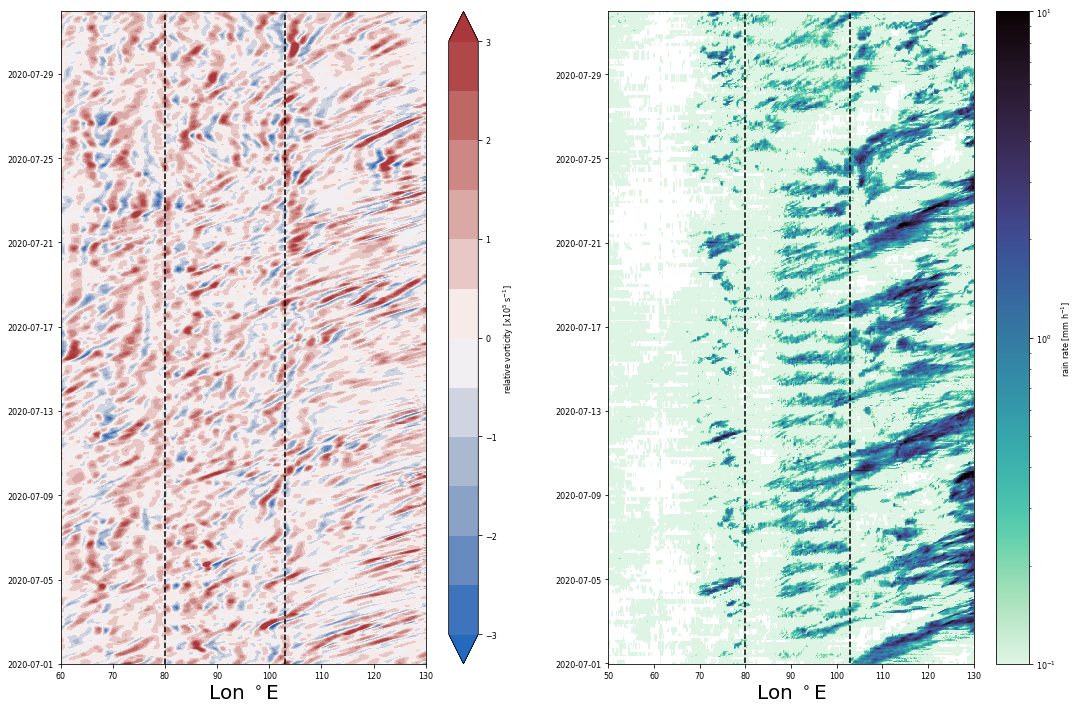

In [21]:
fs = 8
plt.figure(figsize=(18,12))

### plot vorticity ### 
ax = plt.subplot(1,2,1)
cmap1= sns.color_palette("vlag", as_cmap=True)
r1 = np.arange(-3, 3.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf(mean_era.longitude.values, mean_era.time.values, mean_era.values , cmap=cmap1,levels = r1, extend= 'both')
ax.set_xticks(mean_era.longitude.values[::40])
ax.set_xlabel('Lon $^\circ$E', fontsize = 20)
ax.vlines(80,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
ax.vlines(103,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]') 

### plot precip ###
ax = plt.subplot(1,2,2)
r2 = np.arange(0.5,3.5,0.5)
norm = colors.BoundaryNorm(boundaries= r2,  ncolors= 256)
cmap2 =  sns.color_palette("mako_r", as_cmap=True)
norm = colors.LogNorm(vmin=10**(-1), vmax=10**1 ) 
m = ax.pcolormesh(mean_gpm.lon.values, mean_gpm.time.values, mean_gpm.values , cmap=cmap2, norm = norm, shading = 'auto')
#m = ax.contourf(mean_gpm.lon.values, mean_gpm.time.values, mean_gpm.values , cmap=cmap2,levels = r2, extend ='both')
ax.set_xticks(np.arange(50,140,10))
ax.set_xlabel('Lon $^\circ$E', fontsize = 20 )
ax.vlines(80,mean_gpm.time.values[0], mean_gpm.time.values[-1], 'k', '--')
ax.vlines(103,mean_gpm.time.values[0], mean_gpm.time.values[-1], 'k', '--')
plt.colorbar(m, label = 'rain rate [mm h$^{-1}$]')
plt.rcParams.update({'font.size': fs})

plt.show()

### Entire summer season with 3-hour accumulations/ averages 

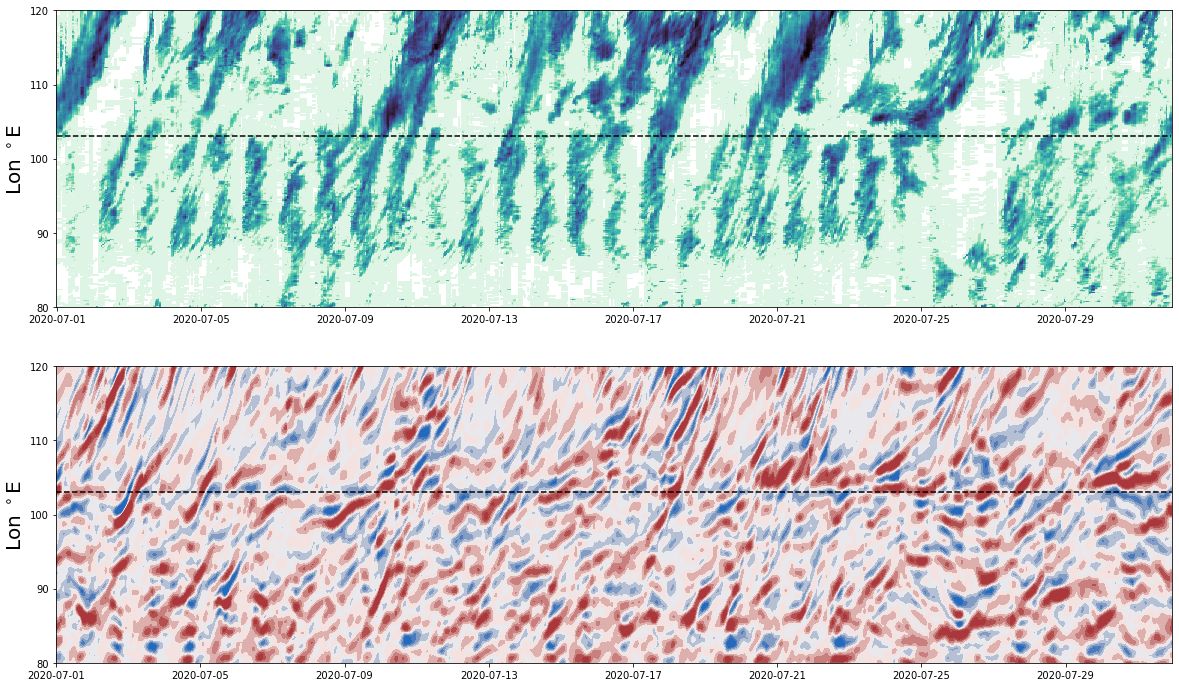

In [56]:
fs = 20
plt.figure(figsize=(20,12))

### plot vorticity ### 
ax = plt.subplot(2, 1,2)
cmap1= sns.color_palette("vlag", as_cmap=True)
r1 = np.arange(-2, 2.5, 0.5)
norm = colors.BoundaryNorm(boundaries= r1,  ncolors= 256)
m=ax.contourf( mean_era.time.values, mean_era.longitude.values,mean_era.values.T , cmap=cmap1,levels = r1, extend= 'both')
ax.set_yticks(mean_era.longitude.values[::40])
ax.set_ylabel('Lon $^\circ$E', fontsize = fs )
ax.hlines(103,mean_era.time.values[0], mean_era.time.values[-1], 'k', '--')
ax.set_ylim(80,120)

### plot precip ###
ax = plt.subplot(2,1,1)
r2 = np.arange(0.5,3.5,0.5)
norm = colors.BoundaryNorm(boundaries= r2,  ncolors= 256)
cmap2 =  sns.color_palette("mako_r", as_cmap=True)
norm = colors.LogNorm(vmin=10**(-1), vmax=10**1 ) 
m = ax.pcolormesh( mean_gpm.time.values,  mean_gpm.lon.values,mean_gpm.values.T , cmap=cmap2, norm = norm, shading = 'auto')
ax.set_yticks(np.arange(50,140,10))
ax.set_ylabel('Lon $^\circ$E', fontsize = fs)
ax.set_ylim(80,120)
ax.hlines(103,mean_gpm.time.values[0], mean_gpm.time.values[-1], 'k', '--')


#plt.colorbar(m, label = 'rain rate [mm h$^{-1}$]', orientation = 'horizontal')
#plt.colorbar(m, label = 'relative vorticity [x10$^5$ s$^{-1}$]', orientation = 'horizontal') 

plt.show()